In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community

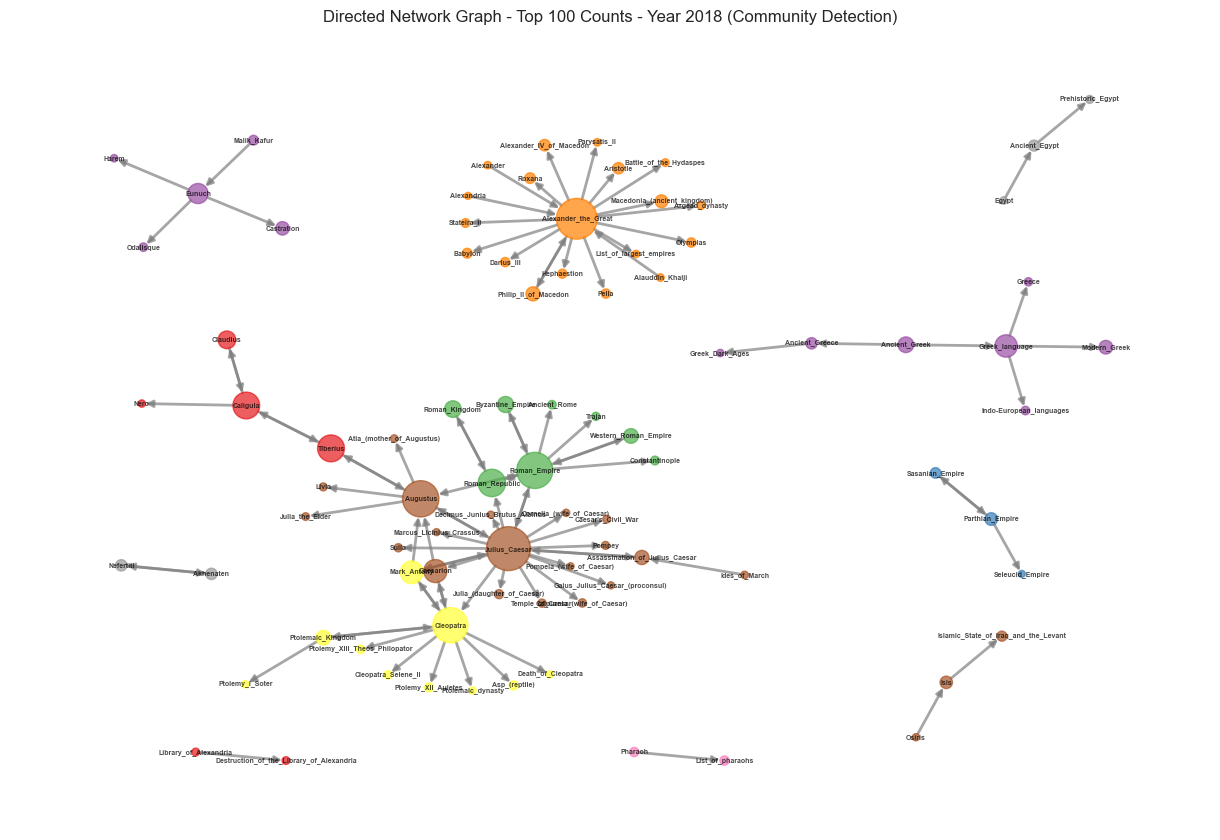

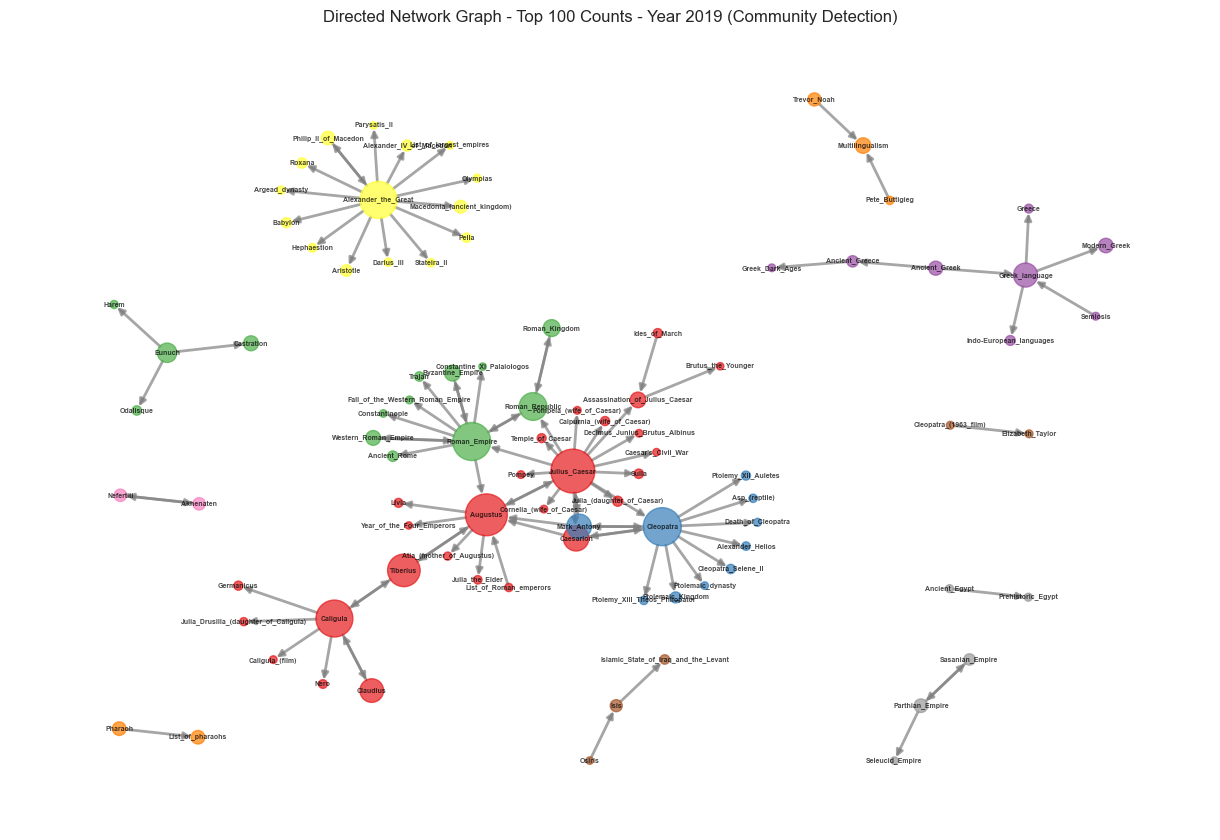

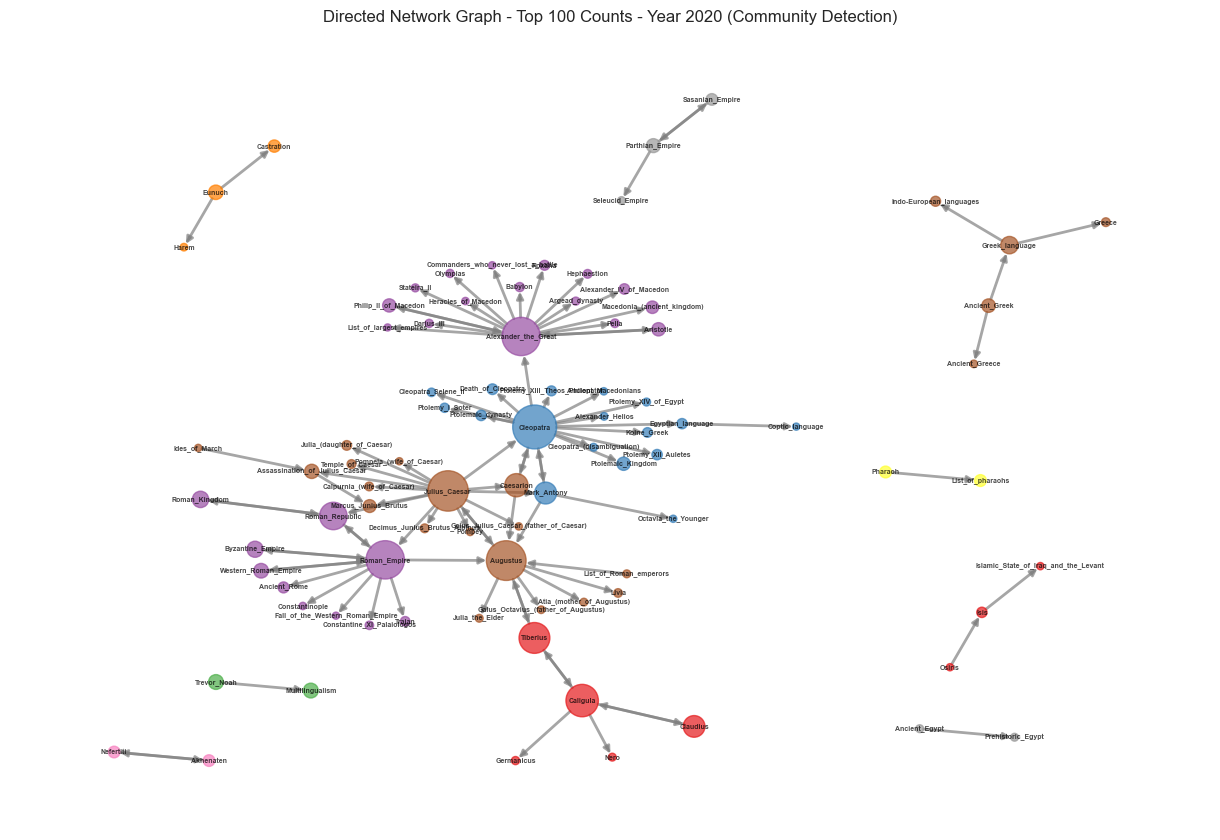

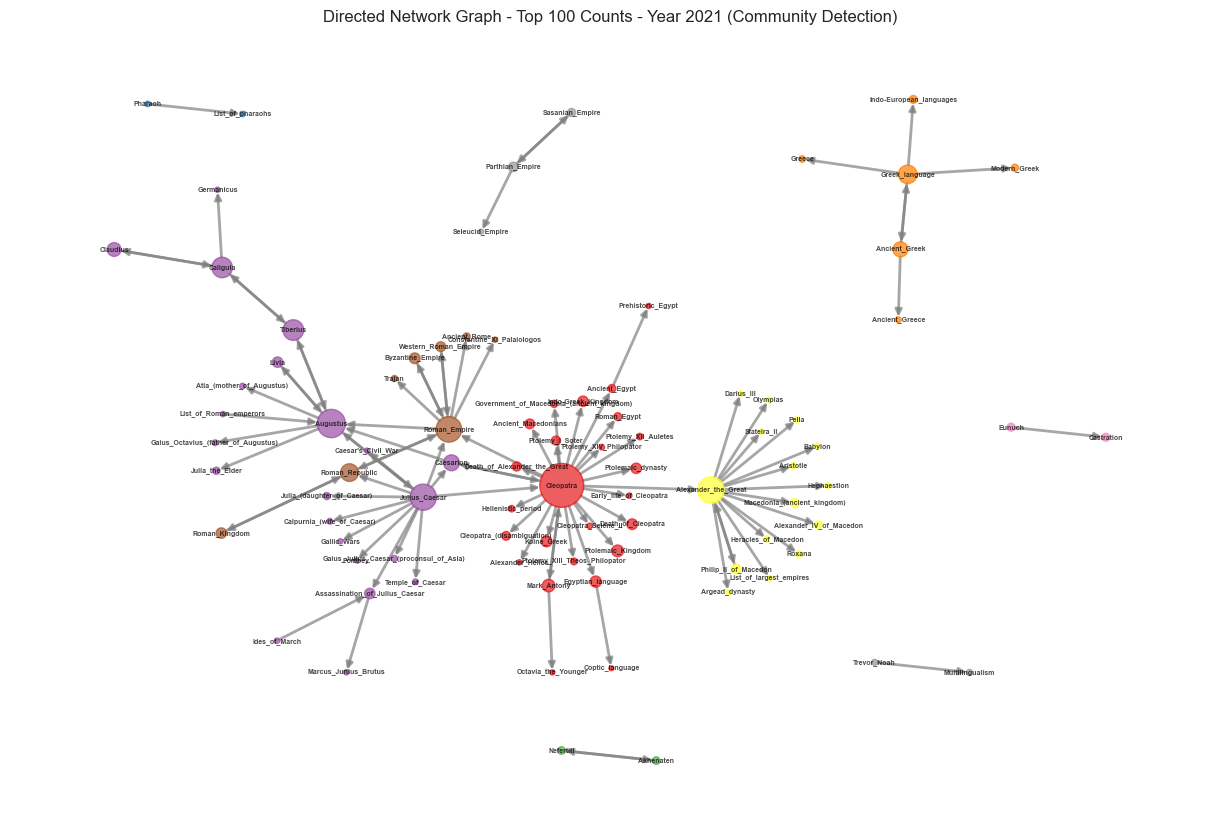

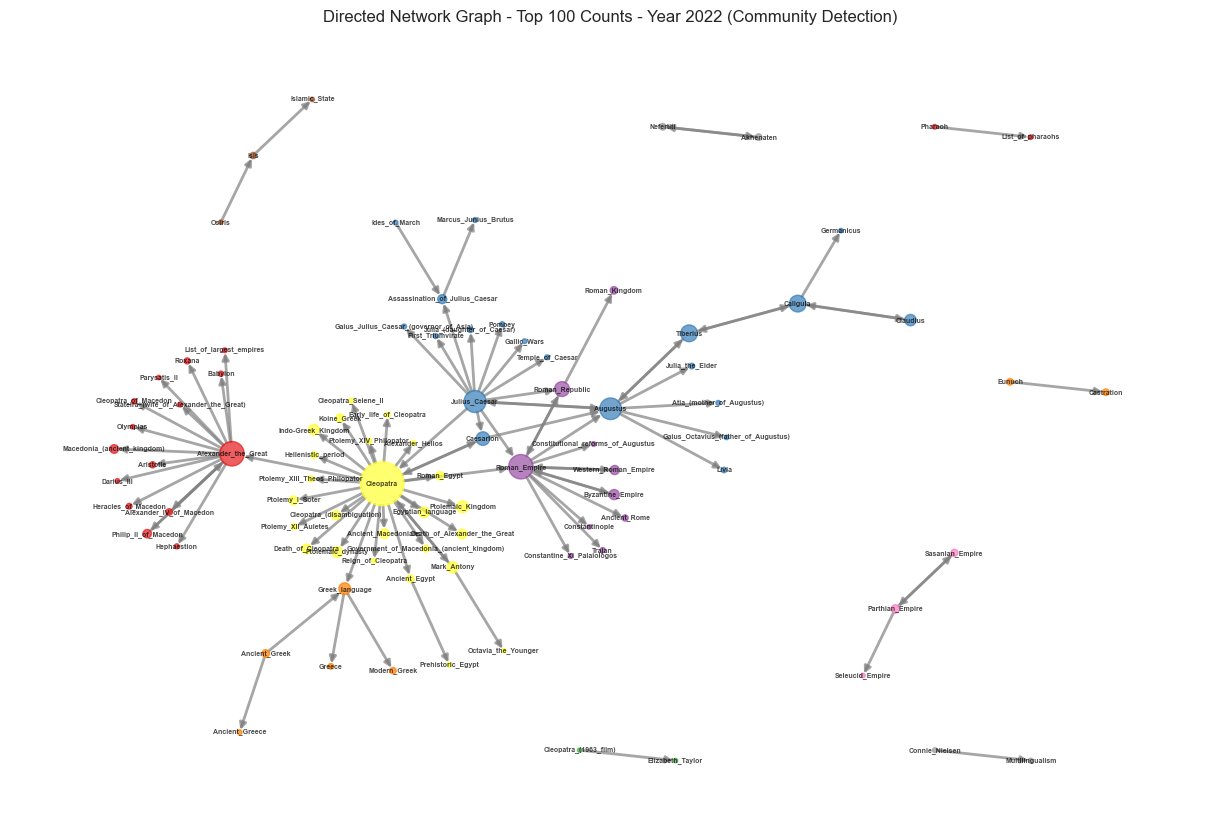

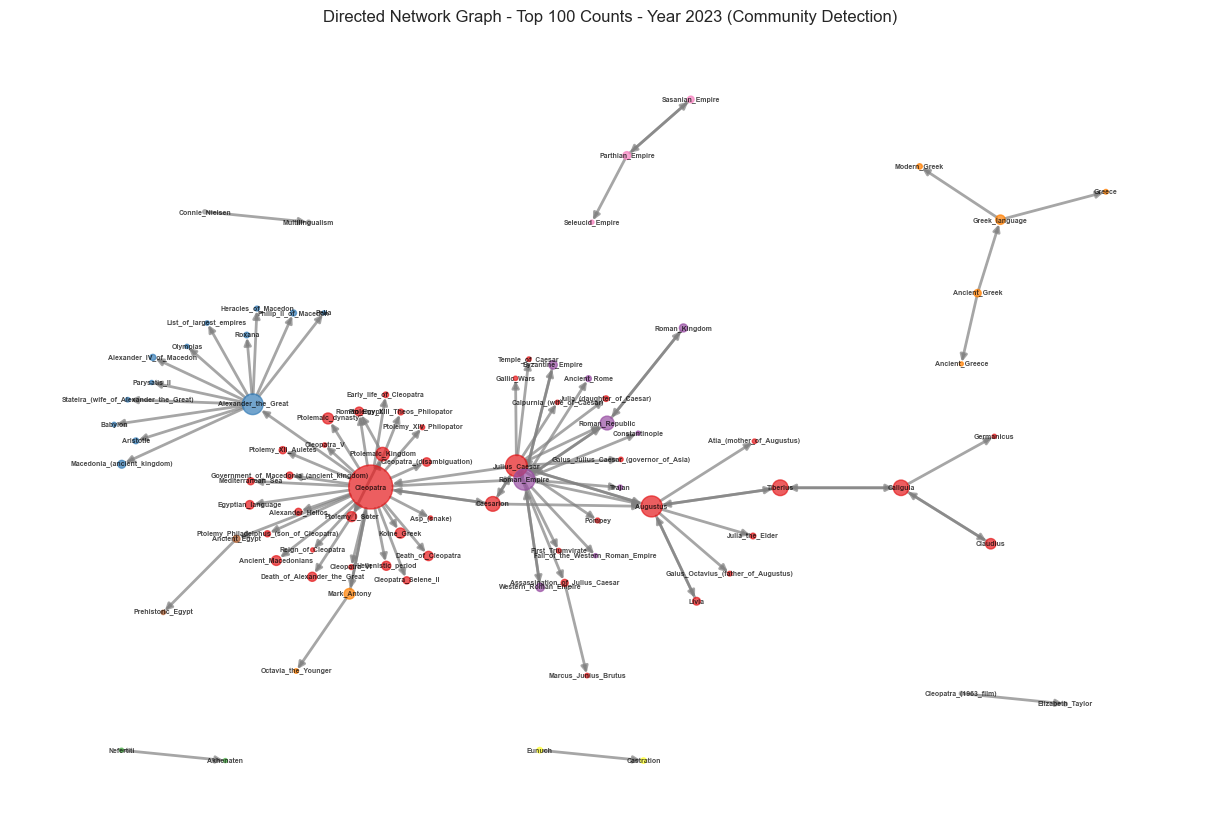

In [11]:
df = pd.read_csv('cleoclicks.csv')

# Filter the DataFrame to edges originating from Cleopatra
#cleopatra_edges_df = df[df['from'] == 'Cleopatra']

# Group the filtered DataFrame by 'year'
grouped_by_year = df.groupby('year')

center_node = 'Cleopatra'
top_n = 100

# Iterate over each group (year) and create a directed graph
for year, group_df in grouped_by_year:
    # Sort the DataFrame by count in descending order and take the top 100
    top_n_df = group_df.sort_values(by='count', ascending=False).head(top_n)

    # Create a directed graph for the current year
    G = nx.DiGraph()

    # Add edges and nodes to the graph based on the filtered DataFrame
    for _, row in top_n_df.iterrows():
        from_node = row['from']
        to_node = row['to']
        weight = row['count']

        # Add nodes and edges to the graph
        G.add_node(from_node)
        G.add_node(to_node)
        G.add_edge(from_node, to_node, weight=weight)

    pos = nx.nx_agraph.graphviz_layout(G, root="Cleopatra")
    #pos[center_node] = (500, 500)

    # Apply Louvain community detection
    partition = community.best_partition(G.to_undirected())
    
    # Get colors for each node based on community
    node_colors = [partition[node] for node in G.nodes()]

    # Calculate the total in-degree and out-degree clicks for each node
    total_clicks = {node: G.in_degree(node, weight='weight') + G.out_degree(node, weight='weight') for node in G.nodes()}

    # Set the size of nodes based on their total clicks
    node_sizes = [total_clicks[node] for node in G.nodes()]

    # Scale the node sizes for better visualization
    scaled_node_sizes = [size / max(node_sizes) * 1000 for size in node_sizes]

    # Visualize the graph for the current year with community coloring
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=scaled_node_sizes, node_color=node_colors, cmap=plt.cm.Set1,
            font_size=5, font_color='black', font_weight='bold', arrowsize=10,
            edge_color='gray', width=2, alpha=0.7)
    plt.title(f'Directed Network Graph - Top {top_n} Counts - Year {year} (Community Detection)')
    plt.savefig('network_graphs/'f'network_cleograph_{year}.svg', format='svg')
    plt.show()
    plt.close()